# Yersinia phage Phi R1-37

Stages of analysis are presented as were performed with the Yersinia phage

In [1]:
#required imports
import os
import pathlib
import re

import numpy as np
import pandas as pd

import Bio.SeqIO as SeqIO
import Bio.SeqUtils.ProtParam as bp

import matplotlib.pyplot as plt
import seaborn as sns

import ungin_functions as ung

In [2]:
os.chdir("/d/user6/tl003/thesis")

In [4]:
#storing proteomes of uracil-DNA phages
genome = "phages/phir1-37.gb"
df = ung.parse_uracil_genome(genome=genome)
print(df)

       ID                                           Sequence  Seq Length
0    g001  MKKNVCVITERDVVLAKRRKGCKLQTDVDVALTEMNNIRFDFRVII...          90
1    g002  MKILKATNPRWFAQSNSTFSKFAIRGATEVLSDWMDNAFSAFCQLY...          83
2    g003  MYITRRKKRFNTTVYYNIYLVPGKMLTVRDKNIYSVYKIFEKELDF...          82
3    g004  MKTIKARGFNKNKILDLTPIKETRRSAMDTLMRRILFIEVDISNHM...          72
4    g005  MKIVRISRKKDRDIGRLIIGHIFATYKELKGTLLFRYDYIGYKCKV...          62
..    ...                                                ...         ...
362  g363  MKTIRTIKHLPFDRYNEQMTKTFLLDQPISKIFMIRKDAEDFDNEN...          84
363  g364  MYISRTNEREMNFKRKSNPKTVREIYTNLLHDDFSLPKYKMYFGFE...          97
364  g365  MKALSIIDDEEREGSIRDYDYKILEPINEILEDLEEEIMISGIGVT...          75
365  g366  MRRLKGKVVGIDNLLRWDRQWGGRMWLEGSAFNDYDVLFKDTVLEF...          74
366  g367  MKIKKFKMKYEYVYHDWLQQNAEEIIWGYQLIKIDPRHFSDIKVEI...          61

[367 rows x 3 columns]


In [4]:
#generating fasta file storing all sequences
ung.write_df_to_fasta(df=df, output_file="uploads/all_seqs.fasta")

In [11]:
#BLAST search performed with PDB blastp to identify any proteins with close homologs
#parsing BLAST output
df_blasthits = ung.parse_blast_output(df=df, input_file="uploads/blast_output.txt")
print(df_blasthits)

       ID  BLAST_evalues  BLAST_seqids
48   g049   1.000000e-29         37.56
130  g131   3.000000e-06         39.44
141  g142   2.000000e-10         39.56
193  g194   3.000000e-60         35.03
212  g213   5.000000e-25         41.36
260  g261  4.000000e-105         36.76
273  g274   5.000000e-58         36.54
297  g298   4.000000e-10         43.24
308  g309   9.000000e-09         43.48
310  g311   2.000000e-50         37.60
326  g327   1.000000e-10         43.06


## Structure prediction: confidence filter

In [ ]:
#monomer prediction using esm_fold
#note that only 363 out of 367 were able to be analysed
#those missing are g083, g099, g294, g295

In [4]:
#complex prediction using esm_fold
#generating required fasta files
with open('uploads/all_seqs.fasta','r') as f:
    scraped_text = f.readlines()
i = 0
with open('uploads/ye_mult.fasta',"w") as g:
    with open('uploads/hsv1_mult.fasta',"w") as h:
        for line in scraped_text:
            if i % 2 == 0:
                g.write(line)
                h.write(line)
            else:
                g.write(f'MPASLTWHDVIGQEKEQPYFKDTLAYVAAERNAGKTIYPAQHDVFNAFRLTELDQVKVVILGQDPYHGPNQAHGLSFSVLPGVPAPPSLVNIYKELATDIPGFQRPNHGFLQSWAEQGVLLLNTVLTVEAGNAHSHANLGWETFTDKVIAALNEHRDGVIFMLWGAHAQKKGRIIDTQRHFILKAPHPSPLSAHRGFLGCKHFSQANQLLQQHGQQPIDWQPKLPTAE:{line}')
                h.write(f'MDLTNGGVSPAATSAPLDWTTFRRVFLIDDAWRPLMEPELANPLTAHLLAEYNRRCQTEEVLPPREDVFSWTRYCTPDEVRVVIIGQDPYHHPGQAHGLAFSVRANVPPPPSLRNVLAAVKNCYPEARMSGHGCLEKWARDGVLLLNTTLTVKRGAAASHSRIGWDRFVGGVIRRLAARRPGLVFMLWGTHAQNAIRPDPRVHCVLKFSHPSPLSKVPFGTCQHFLVANRYLETRSISPIDWSV:{line}')
            i+=1
#note that only 356 out of 367 were able to be analysed due to lack of available memory on Colab
#those missing were the 4 missing from monomer prediction, also g061, g070, g160, g196, g207, g234 and g296

In [5]:
#first filter = confidence of predicted structure
#analysing confidence data output of monomer predictions
ung.analyse_confidence(input_dir="/d/user6/tl003/thesis/monomer_prediction", df=df, scale=True, prediction="monomer")
os.chdir("/d/user6/tl003/thesis")
print(df)

       ID                                           Sequence  Seq Length  \
0    g001  MKKNVCVITERDVVLAKRRKGCKLQTDVDVALTEMNNIRFDFRVII...          90   
1    g002  MKILKATNPRWFAQSNSTFSKFAIRGATEVLSDWMDNAFSAFCQLY...          83   
2    g003  MYITRRKKRFNTTVYYNIYLVPGKMLTVRDKNIYSVYKIFEKELDF...          82   
3    g004  MKTIKARGFNKNKILDLTPIKETRRSAMDTLMRRILFIEVDISNHM...          72   
4    g005  MKIVRISRKKDRDIGRLIIGHIFATYKELKGTLLFRYDYIGYKCKV...          62   
..    ...                                                ...         ...   
362  g363  MKTIRTIKHLPFDRYNEQMTKTFLLDQPISKIFMIRKDAEDFDNEN...          84   
363  g364  MYISRTNEREMNFKRKSNPKTVREIYTNLLHDDFSLPKYKMYFGFE...          97   
364  g365  MKALSIIDDEEREGSIRDYDYKILEPINEILEDLEEEIMISGIGVT...          75   
365  g366  MRRLKGKVVGIDNLLRWDRQWGGRMWLEGSAFNDYDVLFKDTVLEF...          74   
366  g367  MKIKKFKMKYEYVYHDWLQQNAEEIIWGYQLIKIDPRHFSDIKVEI...          61   

     Mean pLDDT: monomer  
0              29.472766  
1              35.307033  
2     

In [11]:
#analysing confidence data output of hsv1 predictions
#may need to be run in batches
ung.analyse_confidence(input_dir="/d/user6/tl003/thesis/hsv1_prediction", df=df, scale=True, prediction="hsv1")
os.chdir("/d/user6/tl003/thesis")
print(df)

       ID                                           Sequence  Seq Length  \
0    g001  MKKNVCVITERDVVLAKRRKGCKLQTDVDVALTEMNNIRFDFRVII...          90   
1    g002  MKILKATNPRWFAQSNSTFSKFAIRGATEVLSDWMDNAFSAFCQLY...          83   
2    g003  MYITRRKKRFNTTVYYNIYLVPGKMLTVRDKNIYSVYKIFEKELDF...          82   
3    g004  MKTIKARGFNKNKILDLTPIKETRRSAMDTLMRRILFIEVDISNHM...          72   
4    g005  MKIVRISRKKDRDIGRLIIGHIFATYKELKGTLLFRYDYIGYKCKV...          62   
..    ...                                                ...         ...   
362  g363  MKTIRTIKHLPFDRYNEQMTKTFLLDQPISKIFMIRKDAEDFDNEN...          84   
363  g364  MYISRTNEREMNFKRKSNPKTVREIYTNLLHDDFSLPKYKMYFGFE...          97   
364  g365  MKALSIIDDEEREGSIRDYDYKILEPINEILEDLEEEIMISGIGVT...          75   
365  g366  MRRLKGKVVGIDNLLRWDRQWGGRMWLEGSAFNDYDVLFKDTVLEF...          74   
366  g367  MKIKKFKMKYEYVYHDWLQQNAEEIIWGYQLIKIDPRHFSDIKVEI...          61   

     Mean pLDDT: monomer  Mean pLDDT: hsv1  ...hsv1 only  ...without hsv1  
0          

In [23]:
#analysing confidence data output of ye predictions
#again, may need to run in batches
ung.analyse_confidence(input_dir="/d/user6/tl003/thesis/ye_prediction", df=df, scale=True, prediction="ye")
os.chdir("/d/user6/tl003/thesis")
print(df)

       ID                                           Sequence  Seq Length  \
0    g001  MKKNVCVITERDVVLAKRRKGCKLQTDVDVALTEMNNIRFDFRVII...          90   
1    g002  MKILKATNPRWFAQSNSTFSKFAIRGATEVLSDWMDNAFSAFCQLY...          83   
2    g003  MYITRRKKRFNTTVYYNIYLVPGKMLTVRDKNIYSVYKIFEKELDF...          82   
3    g004  MKTIKARGFNKNKILDLTPIKETRRSAMDTLMRRILFIEVDISNHM...          72   
4    g005  MKIVRISRKKDRDIGRLIIGHIFATYKELKGTLLFRYDYIGYKCKV...          62   
..    ...                                                ...         ...   
362  g363  MKTIRTIKHLPFDRYNEQMTKTFLLDQPISKIFMIRKDAEDFDNEN...          84   
363  g364  MYISRTNEREMNFKRKSNPKTVREIYTNLLHDDFSLPKYKMYFGFE...          97   
364  g365  MKALSIIDDEEREGSIRDYDYKILEPINEILEDLEEEIMISGIGVT...          75   
365  g366  MRRLKGKVVGIDNLLRWDRQWGGRMWLEGSAFNDYDVLFKDTVLEF...          74   
366  g367  MKIKKFKMKYEYVYHDWLQQNAEEIIWGYQLIKIDPRHFSDIKVEI...          61   

     Mean pLDDT: monomer  Mean pLDDT: hsv1  ...hsv1 only  ...without hsv1  \
0         

In [26]:
#storing all data
df.to_csv("filter1.csv", index=False)

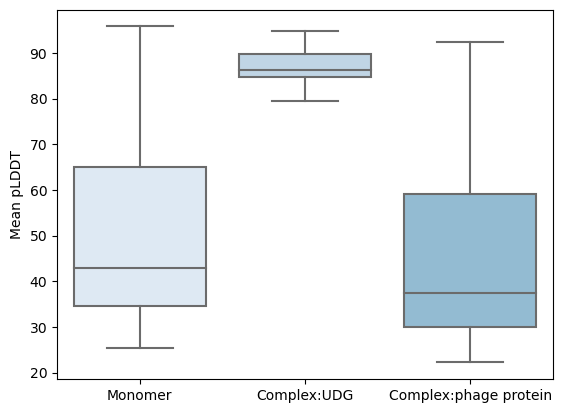

In [36]:
to_boxplot = df.iloc[:,[3,8,9]]
ax=sns.boxplot(to_boxplot)
ax.set(ylabel='Mean pLDDT',xticklabels=['Monomer','Complex:UDG','Complex:phage protein'])
plt.show()
plt.close()

## Structure alignment: similarity filter

In [50]:
#second filter = structural similarity to known UngIns
#performed with tm-align local install
#bash align_structures.sh -a tm -t template -q predicted_structures -o tmalign_output_1.txt

tm = pd.read_csv('uploads/tmalign_output_1.txt')
tm = tm.sort_values('TMScore',ascending=False)
tm_filt=tm[tm['TMScore'] > 0.5].reset_index(drop=True)
print(tm.describe())
print(tm_filt.describe())
ung.plot_tm(df=tm, filename="monomer_prediction/plots/TM")

       Aligned length        RMSD       SeqID     TMScore
count      824.000000  824.000000  824.000000  824.000000
mean        46.354369    3.703932    0.073885    0.352559
std         14.233964    0.901139    0.041982    0.080700
min         14.000000    0.460000    0.000000    0.119780
25%         37.000000    3.200000    0.045000    0.304513
50%         46.000000    3.710000    0.070000    0.350795
75%         55.000000    4.340000    0.098000    0.405210
max         88.000000    5.620000    0.243000    0.577660
       Aligned length       RMSD      SeqID    TMScore
count       32.000000  32.000000  32.000000  32.000000
mean        53.218750   3.194687   0.078406   0.523643
std          6.690071   0.364877   0.038815   0.020086
min         44.000000   2.510000   0.000000   0.502210
25%         50.000000   2.950000   0.052250   0.510840
50%         51.500000   3.140000   0.079000   0.517085
75%         56.000000   3.405000   0.098750   0.524905
max         79.000000   4.230000   0.1

In [39]:
print(tm_filt.sort_values('Query'))

   Template Query  Aligned length  RMSD  SeqID  TMScore
4    6XQI_A  g059              57  3.70  0.053  0.55501
8    6XQI_A  g078              54  3.29  0.037  0.52394
15   6XQI_A  g087              60  3.40  0.050  0.51735
18   6XQI_A  g089              51  3.14  0.137  0.51590
0   8AIL_CF  g096              52  2.92  0.000  0.57766
1    6XQI_A  g102              56  3.30  0.054  0.57498
12   6XQI_A  g124              55  3.43  0.073  0.52053
23   6XQI_A  g144              55  3.60  0.127  0.51104
22  8AIL_CF  g149              50  2.88  0.080  0.51149
6    6XQI_A  g154              57  3.36  0.088  0.53085
28   6XQI_A  g163              51  2.76  0.098  0.50781
27   6XQI_A  g167              57  3.74  0.088  0.50857
20   6XQI_A  g174              51  3.50  0.118  0.51444
13   8AIM_A  g176              67  3.36  0.090  0.51901
5    6XQI_A  g178              56  3.22  0.071  0.53674
30   8AIM_A  g194              79  4.23  0.101  0.50423
10   6XQI_A  g195              46  2.51  0.022  

In [3]:
#known UngIns compared to each other
#bash align_structures.sh -a tm -t template -q template -o tmalign_output_2.txt
tm = pd.read_csv('uploads/tmalign_output_2.txt')
ung.plot_template_comp(df=tm,filename="monomer_prediction/plots/template_comp",templates=["8AIM_A", "8AIN_B", "8AIL_CF", "6XQI_A"])

In [52]:
#complex structures
#Ung prediction checked against 2 different Ungs
tm = pd.read_csv('uploads/ye_output.txt')
print(tm.sort_values('TMScore'))
ung.plot_tm(df=tm, filename="ye_prediction/plots/TM")

     Template Query  Aligned length  RMSD  SeqID  TMScore
832   8AIN_AB  g337             215  1.32  0.502  0.64489
407  8AIL_BCF  g329             219  1.37  0.516  0.64527
395  8AIL_BCF  g307             219  1.35  0.516  0.64611
389  8AIL_BCF  g301             219  1.35  0.516  0.64618
229  8AIL_BCF  g077             219  1.35  0.516  0.64625
..        ...   ...             ...   ...    ...      ...
24    5JK7_GH  g084             258  2.87  0.484  0.79072
61    5JK7_GH  g145             261  3.01  0.475  0.79453
64    5JK7_GH  g149             261  2.86  0.471  0.79828
108   5JK7_GH  g208             267  3.13  0.457  0.80490
136   5JK7_GH  g244             270  3.26  0.474  0.80492

[836 rows x 6 columns]


In [44]:
#complex structures
#Ung prediction checked against 2 different Ungs
tm = pd.read_csv('uploads/ye_output.txt')
tm.describe()

,Aligned length,RMSD,SeqID,TMScore
count,836.000000,836.000000,836.000000,836.000000
mean,235.930622,2.279055,0.484880,0.705737
std,16.475784,0.777914,0.037807,0.038165
min,215.000000,1.190000,0.399000,0.644890
25%,218.000000,1.400000,0.455000,0.682567
50%,239.000000,2.480000,0.489000,0.706915
75%,249.000000,2.940000,0.504000,0.735510
max,279.000000,4.050000,0.560000,0.804920
